In [31]:
import numpy as np
import pandas as pd
import re

import warnings 
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('car_price_prediction_updated.csv')
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.000000,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,906.838128,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11


In [33]:
# Filter for numerical columns only
numerical_data = data.select_dtypes(include=['number'])

for col in numerical_data.columns:
    # 1. Get the top 5 largest values
    top_5_values = numerical_data[col].nlargest(5)
    
    print(f"--- Top 5 Values for Column: {col} ---")
    
    # 2. Loop through each of these top 5 values to find their frequency
    for value in top_5_values:
        # Count how many times this specific value appears in the entire column
        count = numerical_data[col].value_counts()[value]
        print(f"Value: {value} | Occurrences: {count}")
        
    print('='*35)


--- Top 5 Values for Column: Price ---
Value: 26307500 | Occurrences: 1
Value: 872946 | Occurrences: 1
Value: 627220 | Occurrences: 1
Value: 308906 | Occurrences: 1
Value: 297930 | Occurrences: 2
--- Top 5 Values for Column: Levy ---
Value: 11714.0 | Occurrences: 2
Value: 11714.0 | Occurrences: 2
Value: 11706.0 | Occurrences: 1
Value: 7536.0 | Occurrences: 1
Value: 7063.0 | Occurrences: 1
--- Top 5 Values for Column: Mileage ---
Value: 2147483647 | Occurrences: 7
Value: 2147483647 | Occurrences: 7
Value: 2147483647 | Occurrences: 7
Value: 2147483647 | Occurrences: 7
Value: 2147483647 | Occurrences: 7
--- Top 5 Values for Column: Cylinders ---
Value: 16.0 | Occurrences: 5
Value: 16.0 | Occurrences: 5
Value: 16.0 | Occurrences: 5
Value: 16.0 | Occurrences: 5
Value: 16.0 | Occurrences: 5
--- Top 5 Values for Column: Airbags ---
Value: 16 | Occurrences: 93
Value: 16 | Occurrences: 93
Value: 16 | Occurrences: 93
Value: 16 | Occurrences: 93
Value: 16 | Occurrences: 93
--- Top 5 Values for Co

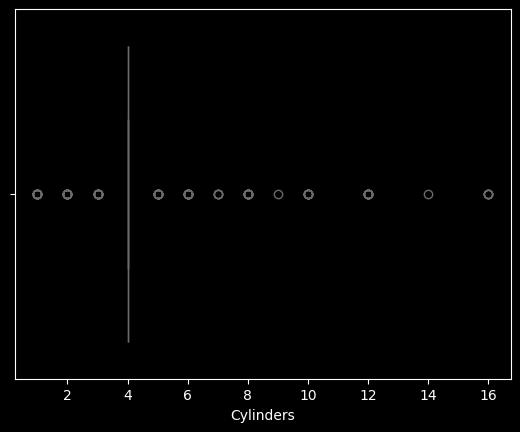

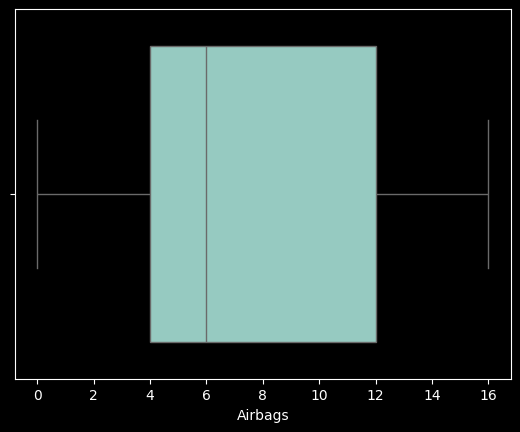

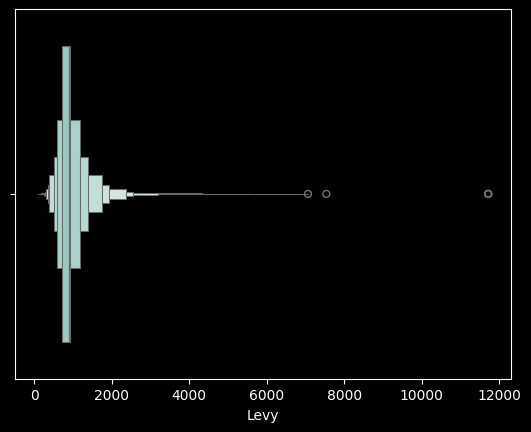

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quickly visualize if these are extreme outliers
sns.boxplot(x=data['Cylinders'])
plt.show()

sns.boxplot(x=data['Airbags'])
plt.show()

sns.boxenplot(x=data['Levy'])
plt.show()

In [35]:
for col in data.columns:
    print(f"Column Name {col} is :\n {data[col].unique()}\n")
    print('='*35)

Column Name Price is :
 [13328 16621  8467 ... 56814 63886 22075]

Column Name Levy is :
 [ 1399.          1018.           906.83812789   862.
   446.           891.           761.           751.
   394.          1053.          1055.          1079.
   810.          2386.          1850.           531.
   586.          1249.          2455.           583.
  1537.          1288.           915.          1750.
   707.          1077.          1486.          1091.
   650.           382.          1436.          1194.
   503.          1017.          1104.           639.
   629.           919.           781.           530.
   640.           765.           777.           779.
   934.           769.           645.          1185.
  1324.           830.          1187.          1111.
   760.           642.          1604.          1095.
   966.           473.          1138.          1811.
   988.           917.          1156.           687.
 11714.           836.          1347.          2866.
  1646.  

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  int64  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  Age               19237 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memo

## Outliers Handling

In [37]:
print(f"Row count before filtering: {data.shape[0]}")

# Exclude vintage vehicles (Age > 30) to ensure a homogeneous resale market.
data = data[data['Age'] <= 30]


# Remove cars < $500 (Likely 'junk' or errors)
# Remove cars > $300,000 (Supercars are not fit general pricing models)
data = data[(data['Price'] > 500) & (data['Price'] < 300000)]


# Remove cars with > 600,000 km
data = data[data['Mileage'] < 600000]


# Levy is a tax. It cannot be extremely high relative to price. 
# We filter out extreme values > 4500 (based on your boxplot visuals)
data = data[data['Levy'] < 4500]



# Remove manufacturers > 10 
mfr_counts = data['Manufacturer'].value_counts()
mfr_to_keep = mfr_counts[mfr_counts >= 10].index
data = data[data['Manufacturer'].isin(mfr_to_keep)]

data.reset_index(drop=True, inplace=True)


# Normalize car model names to ensure consistent categorical encoding,
# then filter out low-frequency models to minimize sparsity,
# reduce overfitting, and improve downstream model generalization
def clean_model_name(text):
    if pd.isna(text):
        return text
    text = str(text).upper().strip()
    text = re.sub(r'[^A-Z0-9 ]', ' ', text)
    text = " ".join(text.split())
    return text

data['Model'] = data['Model'].apply(clean_model_name)

data['Model'] = data['Model'].astype(str).str.strip().str.upper()

model_counts = data['Model'].value_counts()
models_to_keep = model_counts[model_counts > 2].index

data = data[data['Model'].isin(models_to_keep)].reset_index(drop=True)

data['Manufacturer'] = data['Manufacturer'].str.upper().str.strip()



# Feature engineering for engine specifications:
# separates engine capacity as a continuous variable and turbo presence
# as a binary feature to capture both engine size and performance influence
def clean_engine_volume(value):
    value = str(value).lower()
    is_turbo = 1 if 'turbo' in value else 0
    
    numeric_part = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    volume = float(numeric_part[0]) if numeric_part else 0.0
    return volume, is_turbo

data[['Engine_Volume', 'Is_Turbo']] = data['Engine volume'].apply(
    lambda x: pd.Series(clean_engine_volume(x))
)


# Remove unrealistic or extreme cylinder values to eliminate outliers
data = data[data['Cylinders'] <= 12]


data = data.drop(columns=['Engine volume', 'Wheel'], axis=1)

data.rename(columns={
    'Engine_Volume': 'Engine Volume',
    'Is_Turbo': 'Turbo'
}, inplace=True)

print(f"Row count after filtering:  {data.shape[0]}")
print(f"Dropped {19237 - data.shape[0]} rows of garbage data.")

Row count before filtering: 19237
Row count after filtering:  16076
Dropped 3161 rows of garbage data.


In [38]:
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Age,Engine Volume,Turbo
0,13328,1399.000000,LEXUS,RX 450,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,15,3.5,0.0
1,16621,1018.000000,CHEVROLET,EQUINOX,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,14,3.0,0.0
2,8467,906.838128,HONDA,FIT,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,19,1.3,0.0
3,3607,862.000000,FORD,ESCAPE,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,14,2.5,0.0
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,11,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16076,5802,1055.000000,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,107800,6.0,Automatic,Rear,Grey,12,12,3.5,0.0
16077,8467,906.838128,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,26,2.0,1.0
16078,15681,831.000000,HYUNDAI,SONATA,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,14,2.4,0.0
16079,26108,836.000000,HYUNDAI,TUCSON,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,15,2.0,0.0


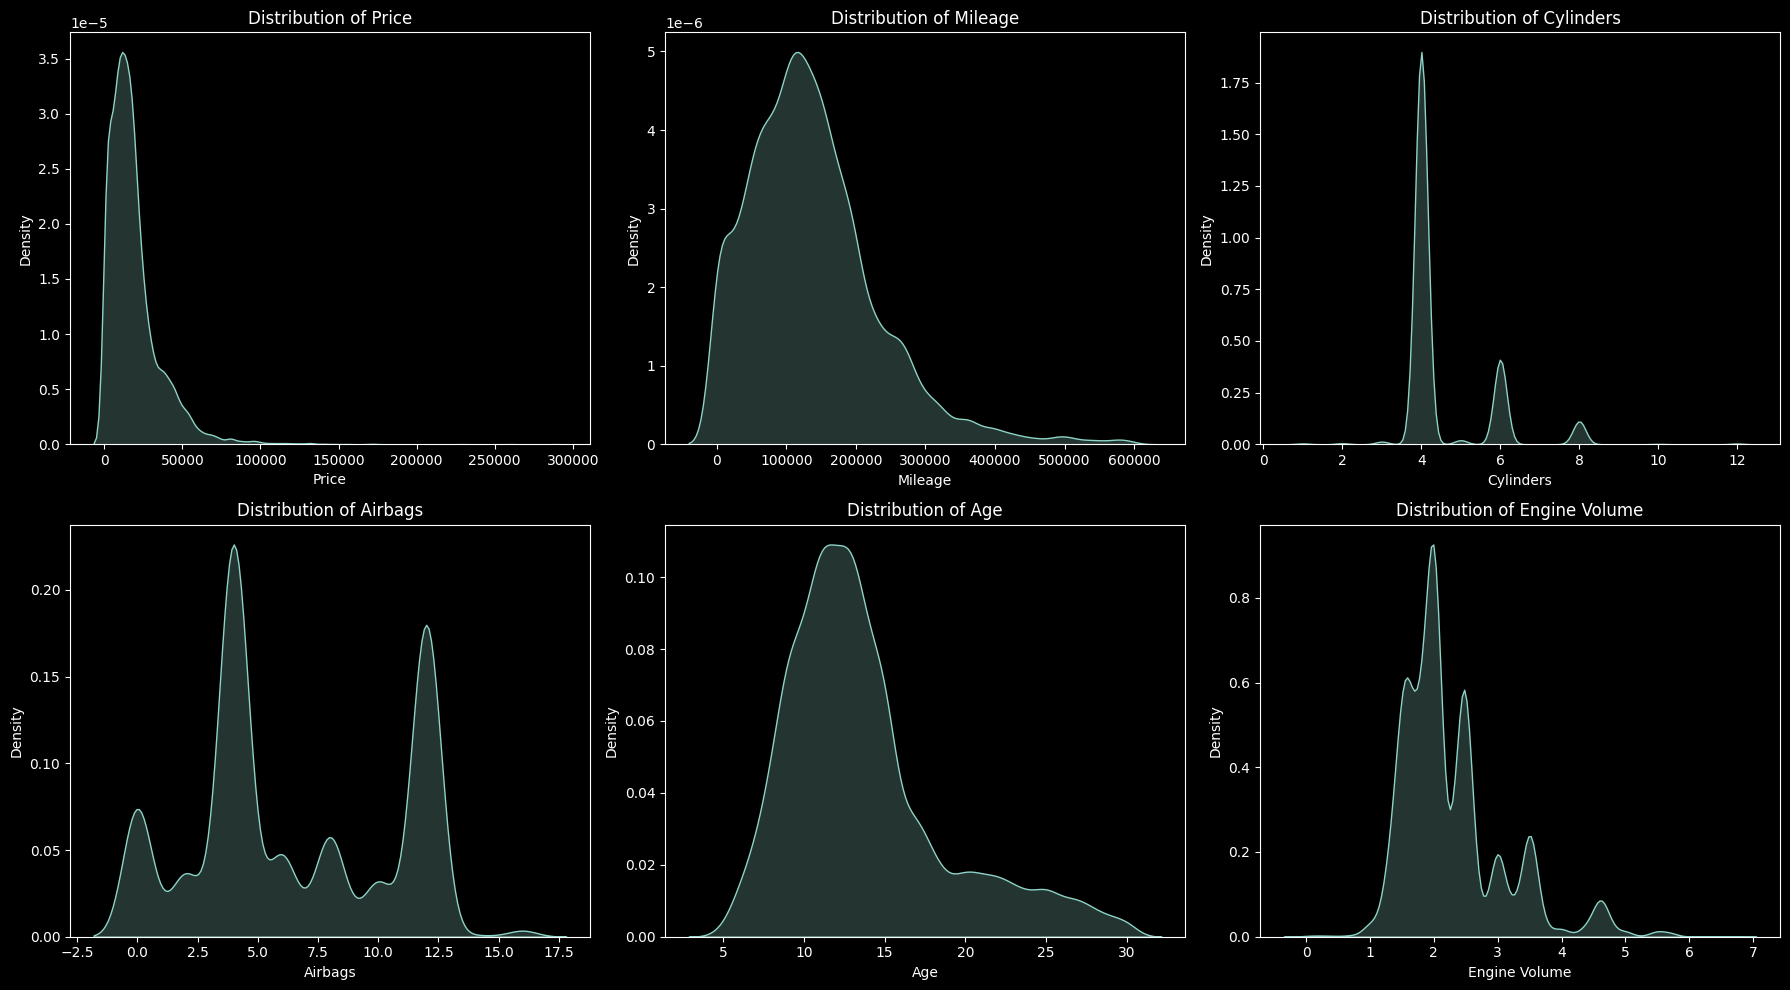

In [39]:
import seaborn as sns

columns_to_plot = [
    'Price', 'Mileage', 'Cylinders',
    'Airbags', 'Age', 'Engine Volume'
]

df_to_plot = data[columns_to_plot]

n_cols = 3  
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col_name in enumerate(columns_to_plot):
    sns.kdeplot(data=df_to_plot, x=col_name, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col_name}', fontsize=12)
    axes[i].set_xlabel(col_name, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

for j in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()

In [9]:
# 1. Filter for only numerical columns (int and float)
numerical_data = data.select_dtypes(include=['number'])

# 2. Loop through only those numerical columns
for col in numerical_data.columns:
    # Use nlargest for the best performance on top-N values
    top_5 = numerical_data[col].nlargest(5)
    
    print(f"Top 5 values for Numerical Column: {col}")
    print(top_5)
    print('='*35)


Top 5 values for Numerical Column: Price
54     84675
105    84675
395    84675
529    84675
601    84675
Name: Price, dtype: int64
Top 5 values for Numerical Column: Mileage
2126     2147483647
5725     2147483647
11058    2147483647
14262    2147483647
14308    2147483647
Name: Mileage, dtype: int64
Top 5 values for Numerical Column: Cylinders
424      16.0
6386     16.0
11664    16.0
15334    16.0
7759     14.0
Name: Cylinders, dtype: float64
Top 5 values for Numerical Column: Airbags
108     16
142     16
204     16
404     16
1224    16
Name: Airbags, dtype: int64
Top 5 values for Numerical Column: Age
24     30
114    30
167    30
371    30
425    30
Name: Age, dtype: int64
Top 5 values for Numerical Column: Engine Volume
2200     20.0
16533    20.0
1009      6.7
8420      6.4
8576      6.4
Name: Engine Volume, dtype: float64
Top 5 values for Numerical Column: Is_Turbo
23    1.0
25    1.0
30    1.0
34    1.0
41    1.0
Name: Is_Turbo, dtype: float64


In [21]:
max1 = data['Engine Volume'].max()
max1

np.float64(20.0)

In [14]:
X = data.drop(['Price'] , axis=1)
y = data['Price']

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

## tranformation of each column accordling for model training

one_hot = ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Color']

power_transform = ['Mileage', 'Age', 'Engine Volume']

standard_transform = ['Airbags']

binary_tranform = ['Leather interior']

high_cardinal = ['Manufacturer', 'Model']

## pipelines for each of the column as per need 

standard_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

power_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('power', PowerTransformer(method='yeo-johnson'))
])

one_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False
    ))
])

binary_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['No', 'Yes']], dtype=int))
])

In [86]:
## cannot be done labelencoding, onehot and ordinal for manufacture and model so using base estimator and transformer mixin for converting to numeric

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_maps = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            self.freq_maps[col] = X[col].value_counts(normalize=True)
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        for col in X.columns:
            X[col] = X[col].map(self.freq_maps[col]).fillna(0)
        return X.values


high_card_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('freq', FrequencyEncoder())
])

In [87]:
transformer = ColumnTransformer([
    ('standard', standard_pipe, standard_transform),
    ('power', power_pipe, power_transform),
    ('onehot', one_pipe, one_hot),
    ('binary', binary_pipe, binary_tranform),
    ('high_card', high_card_pipe, high_cardinal)
], remainder='passthrough')


In [88]:
y = np.log1p(data['Price'])

In [89]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeCV, LassoCV

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y, test_size=0.3,
    random_state=42)

In [91]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "LassoCV": LassoCV()
}

for name, model in models.items():

    pipe = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_test_pred_log  = pipe.predict(X_test)

    y_test_pred  = np.expm1(y_test_pred_log)

    y_test_real  = np.expm1(y_test)

    print(name)
    print("Test  MAE:", mean_absolute_error(y_test_real, y_test_pred))
    print("Test MSE", mean_squared_error(y_test_real, y_test_pred))
    print("Test  R2 :", r2_score(y_test_real, y_test_pred))
    print("="*40)

NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [92]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

ensemble_transformer = ColumnTransformer([
    ('num', num_pipe, power_transform + standard_transform),
    ('onehot', one_pipe, one_hot),
    ('binary', binary_pipe, binary_tranform),
    ('high_card', high_card_pipe, high_cardinal)
], remainder='passthrough')


In [93]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, HistGradientBoostingRegressor
)

from xgboost import XGBRegressor

ensemble_models = {
    'Random Forest': RandomForestRegressor(),
    'Ada Boost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Gradient Boost': GradientBoostingRegressor(),
    'Hist Gradient Boost': HistGradientBoostingRegressor(),
    'XG Boost': XGBRegressor()
}

In [94]:
for name, model in ensemble_models.items():

    pipe = Pipeline([
        ('preprocess', ensemble_transformer),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_test_pred_log  = pipe.predict(X_test)

    y_test_pred  = np.expm1(y_test_pred_log)

    y_test_real  = np.expm1(y_test)

    print(name)
    print("Test  MAE:", mean_absolute_error(y_test_real, y_test_pred))
    print("Test  R2 :", r2_score(y_test_real, y_test_pred))
    print("="*40)

NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
svr_pipe = Pipeline([
    ('preprocess', transformer),
    ('model', SVR(kernel='rbf'))
])

svr_param_dist = {
    'model__C': loguniform(1e-1, 1e3),
    'model__gamma': loguniform(1e-3, 1e-1),
    'model__epsilon': uniform(0.01, 0.2)
}
svr_random = RandomizedSearchCV(
    svr_pipe,
    svr_param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

svr_random.fit(X_train, y_train)

KeyboardInterrupt: 

In [43]:
rf_pipe = Pipeline([
    ('preprocess', ensemble_transformer),
    ('model', RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {
    'model__n_estimators': [200, 400, 600, 800],
    'model__max_depth': [None, 10, 15, 20, 25],
    'model__min_samples_leaf': [1, 3, 5, 10],
    'model__max_features': ['sqrt', 0.5, 0.7]
}

rf_random = RandomizedSearchCV(
    rf_pipe,
    rf_param_dist,
    n_iter=25,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Levy',
                                                                                'Mileage',
                                                                                'Cylinders',
                                                                                'Age',
                                                                                'Engine '
                                                                                'Volume',
                                                                                'Airbags']),
                                                                              ('onehot',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotE...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('freq',
                                                                                                FrequencyEncoder())]),
                                                                               ['Manufacturer',
                                                                                'Model'])])),
                                             ('model',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=42))]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 15, 20,
                                                             25],
                                        'model__max_features': ['sqrt', 0.5,
                                                                0.7],
                                        'model__min_samples_leaf': [1, 3, 5,
                                                                    10],
                                        'model__n_estimators': [200, 400, 600,
                                                                800]},
                   random_state=42, scoring='r2')

In [42]:
et_pipe = Pipeline([
    ('preprocess', ensemble_transformer),
    ('model', ExtraTreesRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

et_param_dist = {
    'model__n_estimators': [300, 500, 700, 900],
    'model__max_depth': [None, 15, 20, 25],
    'model__min_samples_leaf': [1, 3, 5],
    'model__max_features': ['sqrt', 0.5, 0.7]
}

et_random = RandomizedSearchCV(
    et_pipe,
    et_param_dist,
    n_iter=25,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

et_random.fit(X_train, y_train)

NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
hyper_tune_models = {
    'SVR': svr_random,
    'RandomForest': rf_random,
    'ExtraTrees': et_random
}

for name, rs in hyper_tune_models.items():
    print(name)
    print("Best CV R2:", rs.best_score_)
    print("Best Params:", rs.best_params_)
    print("="*40)

SVR
Best CV R2: 0.43959983808100445
Best Params: {'model__C': 15.375920235481747, 'model__epsilon': 0.04697089110510541, 'model__gamma': 0.08692991511139551}
RandomForest
Best CV R2: 0.6390123263595453
Best Params: {'model__n_estimators': 800, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': None}
ExtraTrees
Best CV R2: 0.6118763923426973
Best Params: {'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_features': 0.7, 'model__max_depth': 25}


In [44]:
final_rf = Pipeline([
    ('preprocess', ensemble_transformer),
    ('model', RandomForestRegressor(
        n_estimators=800,
        max_depth=None,
        min_samples_leaf=1,
        max_features=0.5,
        random_state=42,
        n_jobs=-1
    ))
])

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    final_rf,
    X,
    y,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("CV R2 scores:", cv_scores)
print("Mean CV R2   :", np.mean(cv_scores))
print("Std CV R2    :", np.std(cv_scores))

ValueError: Found input variables with inconsistent numbers of samples: [17602, 15884]

In [ ]:
import joblib
joblib.dump(final_rf, "random_forest_car_price_model.pkl")

['random_forest_car_price_model.pkl']